In [0]:
# This program predicts the Stock Market Price using machine learning.
# import dependencies
import numpy as np 
'''
import the entire numpy module with a short name "np". 
This enables us to work with all the functions present in the module.
NumPy is a general-purpose array-processing package. 
It provides a high-performance multidimensional array 
object, and tools for working with these arrays.
'''
import pandas as pd
'''
import the entire pandas module with a short name "pd". 
This enables us to work with all the functions present in the module.
pandas is a fast, powerful, flexible and easy to use open 
source data analysis and manipulation tool
'''
from sklearn.model_selection import train_test_split
'''
Splits arrays or matrices into random train and test subsets.
'''
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

In [48]:
# getting the data file
df = pd.read_excel('KSE100.xlsx')
# printing data
print(df.head())
# the ".head" prints only first 5 data 

   Unnamed: 0 <TICKER>     <DATE>  ...     <LOW>   <CLOSE>      <VOL>
0           1  KSE-100 2015-01-01  ...  32134.53  32480.35  186250880
1           2  KSE-100 2015-01-02  ...  32465.35  32731.61  235201230
2           3  KSE-100 2015-01-05  ...  32663.32  32757.79  248960940
3           4  KSE-100 2015-01-06  ...  32558.31  32668.73  173641810
4           5  KSE-100 2015-01-07  ...  32639.80  32835.95  175312820

[5 rows x 8 columns]


In [49]:
# getting the data file
df = pd.read_excel('KSE100.xlsx')
# printing data
print(df.tail())
# the ".head" prints only first 5 data 

     Unnamed: 0 <TICKER>     <DATE>  ...     <LOW>   <CLOSE>      <VOL>
741         742  KSE-100 2017-12-22  ...  38710.01  39470.89   98599630
742         743  KSE-100 2017-12-26  ...  39292.98  39525.75   89193580
743         744  KSE-100 2017-12-27  ...  39614.37  40146.73  107268910
744         745  KSE-100 2017-12-28  ...  40031.19  40371.31   94198170
745         746  KSE-100 2017-12-29  ...  40271.18  40471.48  126854590

[5 rows x 8 columns]


In [50]:
# printing only <CLOSE> column
df = df[['<CLOSE>']]
print(df.tail())
# the ".tail" prints only last 5 data 

      <CLOSE>
741  39470.89
742  39525.75
743  40146.73
744  40371.31
745  40471.48


In [51]:
# A variable for predicting 'n' days out into the future
forecast_out=1
# Create another column (the target or dependent variable) shifted 'n' units up
df['PREDICTION'] = df[['<CLOSE>']].shift(-1)
# print the new data set
print(df.head())

    <CLOSE>  PREDICTION
0  32480.35    32731.61
1  32731.61    32757.79
2  32757.79    32668.73
3  32668.73    32835.95
4  32835.95    33117.47


In [52]:
# print the new data set
print(df.tail())

      <CLOSE>  PREDICTION
741  39470.89    39525.75
742  39525.75    40146.73
743  40146.73    40371.31
744  40371.31    40471.48
745  40471.48         NaN


In [53]:
# A variable for predicting 'n' days out into the future
forecast_out=30
# Create another column (the target or dependent variable) shifted 'n' units up
df['PREDICTION'] = df[['<CLOSE>']].shift(-forecast_out)
# print the new data set
print(df.tail())

      <CLOSE>  PREDICTION
741  39470.89         NaN
742  39525.75         NaN
743  40146.73         NaN
744  40371.31         NaN
745  40471.48         NaN


In [54]:
# print the new data set
print(df.head())

    <CLOSE>  PREDICTION
0  32480.35    33943.20
1  32731.61    33796.44
2  32757.79    33801.11
3  32668.73    33718.86
4  32835.95    33942.28


In [55]:
# print the new data set
print(df[87:103])

      <CLOSE>  PREDICTION
87   33742.88    34674.61
88   33530.30    34526.70
89   32506.36    34278.42
90   33023.80    34133.84
91   32915.44    34331.94
92   33103.73    34077.92
93   33039.20    33885.13
94   32886.06    34093.55
95   32729.55    34398.86
96   32599.00    34843.61
97   32617.74    35186.56
98   32605.62    35456.35
99   32707.22    35502.28
100  32510.35    35537.69
101  32842.59    35328.83
102  32763.48    35147.13


In [56]:
# Create the independent data set (X) 
# Convert the dataframe to a numpy array
X = np.array(df.drop(['PREDICTION'],1))
#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[32480.35]
 [32731.61]
 [32757.79]
 [32668.73]
 [32835.95]
 [33117.47]
 [33324.82]
 [33418.2 ]
 [33371.29]
 [33585.75]
 [33765.61]
 [33786.44]
 [34014.26]
 [34121.3 ]
 [34329.5 ]
 [34146.97]
 [34026.59]
 [34466.53]
 [34538.45]
 [34386.86]
 [34408.74]
 [34443.87]
 [34676.31]
 [34826.51]
 [34672.25]
 [34656.94]
 [34570.3 ]
 [34432.89]
 [34203.99]
 [33786.42]
 [33943.2 ]
 [33796.44]
 [33801.11]
 [33718.86]
 [33942.28]
 [33993.  ]
 [33926.7 ]
 [33895.46]
 [33845.3 ]
 [33762.8 ]
 [33632.19]
 [33213.58]
 [33188.77]
 [33242.95]
 [33368.84]
 [33263.66]
 [32860.57]
 [32566.59]
 [32539.61]
 [32582.68]
 [32929.09]
 [32454.91]
 [32342.26]
 [31524.98]
 [31451.62]
 [31800.26]
 [31310.73]
 [31086.51]
 [30678.97]
 [29957.83]
 [28927.04]
 [30233.87]
 [30605.06]
 [31132.25]
 [31413.96]
 [31752.17]
 [31600.73]
 [31887.3 ]
 [32013.91]
 [32350.93]
 [32248.45]
 [32109.87]
 [32248.86]
 [32736.44]
 [33234.73]
 [33304.64]
 [33035.77]
 [33490.65]
 [33456.74]
 [33775.12]
 [33844.3 ]
 [33575.94]
 [33460.01]
 [33

In [57]:
# Create the independent data set (X) 
# Convert the dataframe to a numpy array
X = np.array(df['<CLOSE>'])
#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[32480.35 32731.61 32757.79 32668.73 32835.95 33117.47 33324.82 33418.2
 33371.29 33585.75 33765.61 33786.44 34014.26 34121.3  34329.5  34146.97
 34026.59 34466.53 34538.45 34386.86 34408.74 34443.87 34676.31 34826.51
 34672.25 34656.94 34570.3  34432.89 34203.99 33786.42 33943.2  33796.44
 33801.11 33718.86 33942.28 33993.   33926.7  33895.46 33845.3  33762.8
 33632.19 33213.58 33188.77 33242.95 33368.84 33263.66 32860.57 32566.59
 32539.61 32582.68 32929.09 32454.91 32342.26 31524.98 31451.62 31800.26
 31310.73 31086.51 30678.97 29957.83 28927.04 30233.87 30605.06 31132.25
 31413.96 31752.17 31600.73 31887.3  32013.91 32350.93 32248.45 32109.87
 32248.86 32736.44 33234.73 33304.64 33035.77 33490.65 33456.74 33775.12
 33844.3  33575.94 33460.01 33729.96 33723.53 33533.64 33839.28 33742.88
 33530.3  32506.36 33023.8  32915.44 33103.73 33039.2  32886.06 32729.55
 32599.   32617.74 32605.62 32707.22 32510.35 32842.59 32763.48 33056.79
 33563.38 33895.34 33908.62 34085.74 34012.49 34151.1

In [58]:
# Create the dependent data set (y)  
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['PREDICTION'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[33943.2  33796.44 33801.11 33718.86 33942.28 33993.   33926.7  33895.46
 33845.3  33762.8  33632.19 33213.58 33188.77 33242.95 33368.84 33263.66
 32860.57 32566.59 32539.61 32582.68 32929.09 32454.91 32342.26 31524.98
 31451.62 31800.26 31310.73 31086.51 30678.97 29957.83 28927.04 30233.87
 30605.06 31132.25 31413.96 31752.17 31600.73 31887.3  32013.91 32350.93
 32248.45 32109.87 32248.86 32736.44 33234.73 33304.64 33035.77 33490.65
 33456.74 33775.12 33844.3  33575.94 33460.01 33729.96 33723.53 33533.64
 33839.28 33742.88 33530.3  32506.36 33023.8  32915.44 33103.73 33039.2
 32886.06 32729.55 32599.   32617.74 32605.62 32707.22 32510.35 32842.59
 32763.48 33056.79 33563.38 33895.34 33908.62 34085.74 34012.49 34151.11
 34270.28 34323.84 34594.7  34651.29 34710.29 34516.3  34482.   34674.61
 34526.7  34278.42 34133.84 34331.94 34077.92 33885.13 34093.55 34398.86
 34843.61 35186.56 35456.35 35502.28 35537.69 35328.83 35147.13 35112.29
 35496.62 35446.89 35699.75 35887.66 36056.68 35934.

In [59]:
# Create the independent data set (X) 
# Convert the dataframe to a numpy array
X = np.array(df.drop(['PREDICTION'],1))
#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[32480.35]
 [32731.61]
 [32757.79]
 [32668.73]
 [32835.95]
 [33117.47]
 [33324.82]
 [33418.2 ]
 [33371.29]
 [33585.75]
 [33765.61]
 [33786.44]
 [34014.26]
 [34121.3 ]
 [34329.5 ]
 [34146.97]
 [34026.59]
 [34466.53]
 [34538.45]
 [34386.86]
 [34408.74]
 [34443.87]
 [34676.31]
 [34826.51]
 [34672.25]
 [34656.94]
 [34570.3 ]
 [34432.89]
 [34203.99]
 [33786.42]
 [33943.2 ]
 [33796.44]
 [33801.11]
 [33718.86]
 [33942.28]
 [33993.  ]
 [33926.7 ]
 [33895.46]
 [33845.3 ]
 [33762.8 ]
 [33632.19]
 [33213.58]
 [33188.77]
 [33242.95]
 [33368.84]
 [33263.66]
 [32860.57]
 [32566.59]
 [32539.61]
 [32582.68]
 [32929.09]
 [32454.91]
 [32342.26]
 [31524.98]
 [31451.62]
 [31800.26]
 [31310.73]
 [31086.51]
 [30678.97]
 [29957.83]
 [28927.04]
 [30233.87]
 [30605.06]
 [31132.25]
 [31413.96]
 [31752.17]
 [31600.73]
 [31887.3 ]
 [32013.91]
 [32350.93]
 [32248.45]
 [32109.87]
 [32248.86]
 [32736.44]
 [33234.73]
 [33304.64]
 [33035.77]
 [33490.65]
 [33456.74]
 [33775.12]
 [33844.3 ]
 [33575.94]
 [33460.01]
 [33

In [0]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [62]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.0713383315000633


In [63]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.8829402424335785


In [65]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['PREDICTION'],1))[-forecast_out:]
print(x_forecast)

[[40813.31]
 [40844.4 ]
 [40316.93]
 [40548.83]
 [40591.87]
 [40266.21]
 [40248.41]
 [40032.17]
 [39634.13]
 [39672.89]
 [40010.36]
 [40049.8 ]
 [39945.41]
 [39907.32]
 [38784.66]
 [39080.  ]
 [38481.7 ]
 [38525.11]
 [38819.65]
 [38223.55]
 [38645.9 ]
 [38383.97]
 [37919.42]
 [38208.06]
 [38715.77]
 [39470.89]
 [39525.75]
 [40146.73]
 [40371.31]
 [40471.48]]


In [66]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[40841.31143343 40869.43873864 40392.23353833 40602.03482741
 40640.97336766 40346.34685708 40330.24309276 40134.60949746
 39774.50037669 39809.56677585 40114.87786264 40150.55946178
 40056.11721699 40021.65697076 39005.97988926 39273.17571814
 38731.89020172 38771.16348313 39037.63554732 38498.3403838
 38880.44290404 38643.47329796 38223.19219041 38484.32649002
 38943.65470252 39626.816192   39676.44835552 40238.25260085
 40441.43144303 40532.05582909]
[38891.94059707 38891.94059707 38891.94059707 38899.18127819
 38891.94059707 38891.94059707 38891.94782585 39653.83561318
 38891.94059707 38892.13533116 38891.94070655 39880.92420375
 38891.94059707 39881.75284737 38891.94059707 38891.94059707
 38891.9410307  38891.94059707 38891.94059707 38891.94059821
 38891.94059707 38891.94059708 38891.94059707 38891.94059707
 38891.94059707 39606.63782718 38891.94059707 38891.96476319
 38894.9031912  39300.96990492]


Text(0, 0.5, 'PREDICTION')

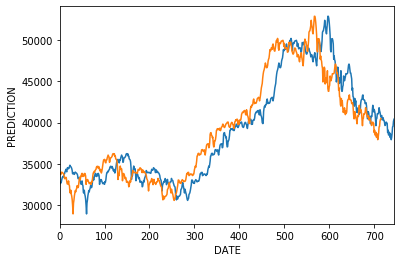

In [69]:
df['<CLOSE>'].plot()
df['PREDICTION'].plot()
plt.xlabel("DATE")
plt.ylabel("PREDICTION")